In [ ]:
""" Modify the MLP from the previous question to use different activation functions (ReLU, 
Sigmoid, Tanh) in the hidden layers. Evaluate and compare the performance of each 
model on the same dataset (MNIST)"""

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------- -------------------------------- 30.7/162.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.8 kB 1.0 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 2.6 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.0 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.0 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.0 MB 4.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.0 MB 6.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.2/8.0 MB 7.8 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 8.1 MB/s eta 0:00:01
   ---------

Matplotlib is building the font cache; this may take a moment.
c:\Users\samir\anaconda3\envs\tf-gpu\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9714 - loss: 0.1071
Model with Relu Activation Function:
Test Loss: 0.08910928666591644, Test Accuracy: 0.9749000072479248

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.0973
Model with Sigmoid Activation Function:
Test Loss: 0.08363310247659683, Test Accuracy: 0.9745000004768372

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9695 - loss: 0.1027
Model with Tanh Activation Function:
Test Loss: 0.09195510298013687, Test Accuracy: 0.9733999967575073



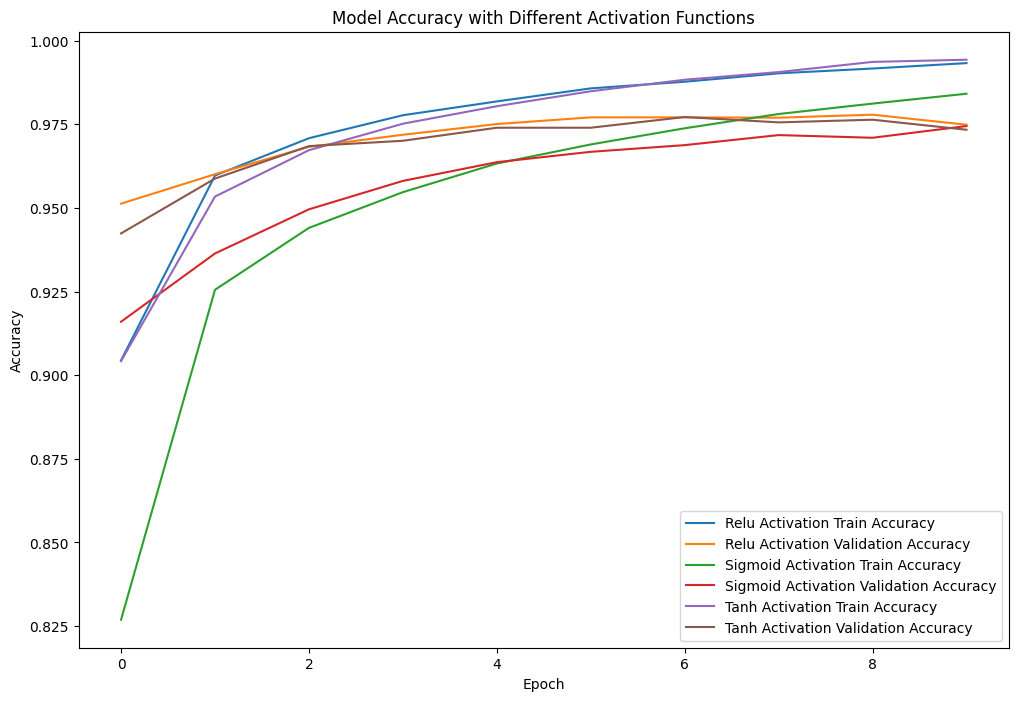

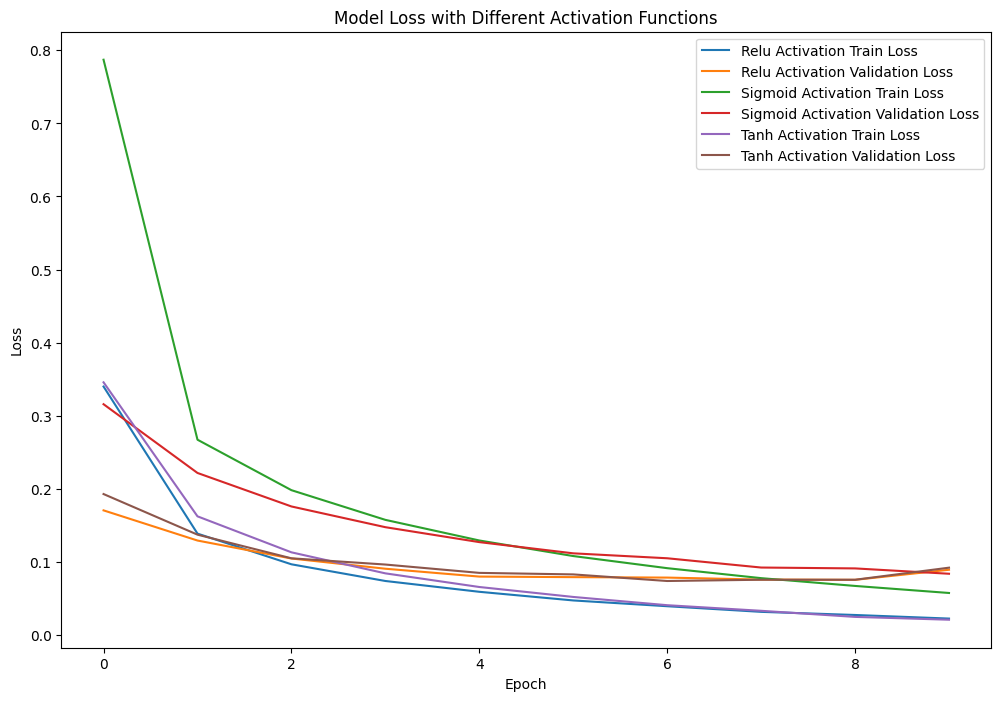

In [3]:
!pip install matplotlib


import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the models with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation_func in activation_functions:
    model = Sequential()
    model.add(Dense(128, activation=activation_func, input_shape=(28*28,)))
    model.add(Dense(64, activation=activation_func))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)
    histories[activation_func] = history.history

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Model with {activation_func.capitalize()} Activation Function:')
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}\n')

# Plot the training history for each model
def plot_training_history(histories):
    plt.figure(figsize=(12, 8))
    for activation_func, history in histories.items():
        plt.plot(history['accuracy'], label=f'{activation_func.capitalize()} Activation Train Accuracy')
        plt.plot(history['val_accuracy'], label=f'{activation_func.capitalize()} Activation Validation Accuracy')

    plt.title('Model Accuracy with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    for activation_func, history in histories.items():
        plt.plot(history['loss'], label=f'{activation_func.capitalize()} Activation Train Loss')
        plt.plot(history['val_loss'], label=f'{activation_func.capitalize()} Activation Validation Loss')

    plt.title('Model Loss with Different Activation Functions')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(histories)
